   #     Electrical Line Current & Voltage Fault Detection and Classification

<div>
<img src="power system.png" alt="Drawing" style="width: 580px;float: left;"/>
<img src="Electrical.gif" alt="Drawing" style="width: 400px;float: right;height : 240px"/>
</div>

In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
df = pd.read_csv('Electric Circuit Train.csv')
df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [3]:
#Check Number of Rows and Columns
df.shape

(7861, 10)

In [4]:
df.isna().sum().any()  #There is no Null values

False

In [5]:
df.duplicated().any()  #There are no duplicates

False

In [6]:
df.info()  # Check the datatype,count of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [7]:
df.describe()  #Basic statistics on the features

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


In [8]:
df.columns

Index(['G', 'C', 'B', 'A', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')

<AxesSubplot:xlabel='Ia', ylabel='Va'>

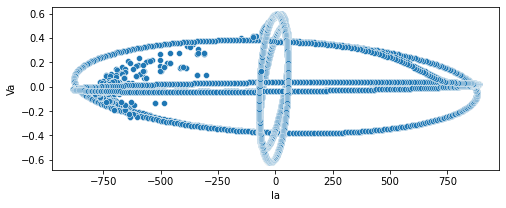

In [9]:
plt.figure(figsize = (8,3))
sns.scatterplot(x = df['Ia'],y = df['Va'])

<AxesSubplot:xlabel='Ib', ylabel='Va'>

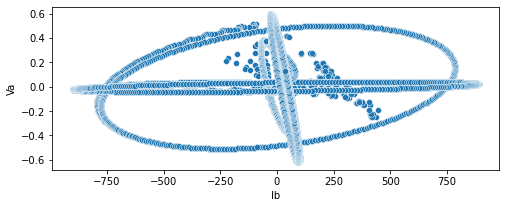

In [10]:
plt.figure(figsize = (8,3))
sns.scatterplot(x = df['Ib'],y = df['Va'])

<AxesSubplot:xlabel='Ia', ylabel='Vc'>

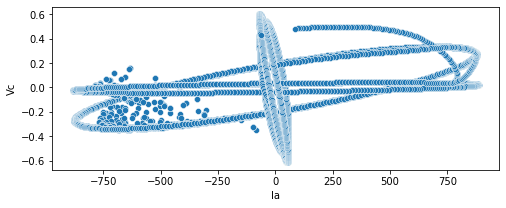

In [11]:
plt.figure(figsize = (8,3))
sns.scatterplot(x = df['Ia'],y = df['Vc'])

<AxesSubplot:xlabel='Ic', ylabel='Va'>

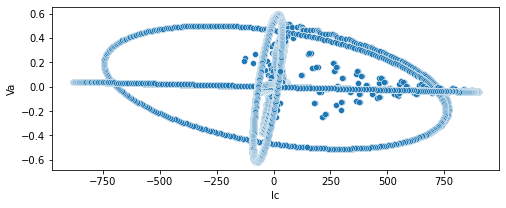

In [12]:
plt.figure(figsize = (8,3))
sns.scatterplot(x = df['Ic'],y = df['Va'])

<AxesSubplot:xlabel='Ib', ylabel='Vb'>

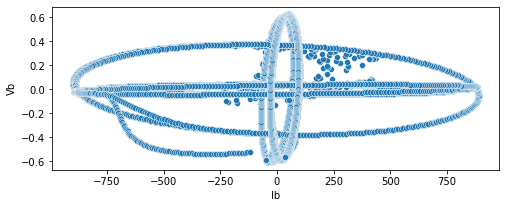

In [13]:
plt.figure(figsize = (8,3))
sns.scatterplot(x = df['Ib'],y = df['Vb'])

<AxesSubplot:xlabel='Ic', ylabel='Vc'>

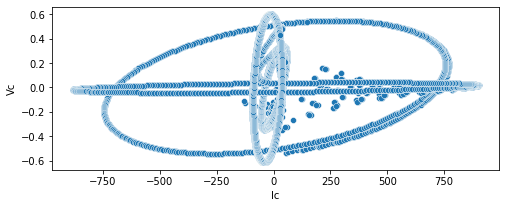

In [14]:
plt.figure(figsize = (8,3))
sns.scatterplot(x = df['Ic'],y = df['Vc'])

FINDINGS:
       
       1. We have found there is no missing values neither duplicates
       2. The above visuals depicts that our data is non linear, forming some spherical like structure
       3. There are 7861 records and 10 features
       4. There are 4 target features and 6 Independent features

Now in further analysis we will check for Outliers and take neccessary steps to remove them
       

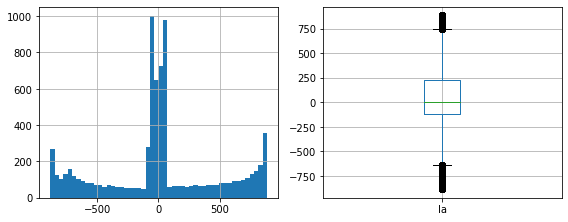

In [15]:
plt.figure(figsize = (8,6))
plt.subplot(2,2,1) # 2-rows, 2-columns and 1st subplot
df['Ia'].hist(bins = 50)
plt.subplot(2,2,2) # 2-rows, 2-columns and 2nd subplot
df.boxplot('Ia')
plt.tight_layout() # prevent the overlapping of figures

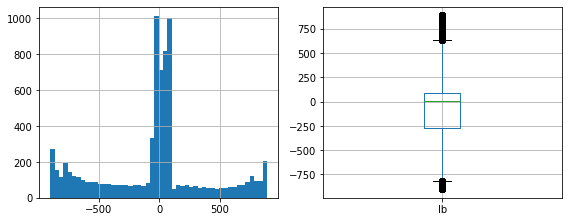

In [16]:
plt.figure(figsize = (8,6))
plt.subplot(2,2,1) # 2-rows, 2-columns and 1st subplot
df['Ib'].hist(bins = 50)
plt.subplot(2,2,2) # 2-rows, 2-columns and 2nd subplot
df.boxplot('Ib')
plt.tight_layout() # prevent the overlapping of figures

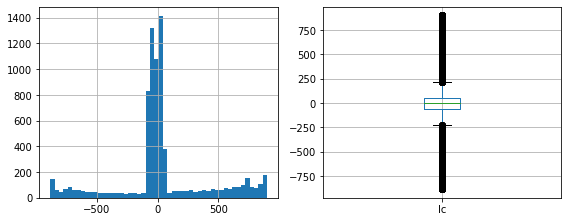

In [17]:
plt.figure(figsize = (8,6))
plt.subplot(2,2,1) # 2-rows, 2-columns and 1st subplot
df['Ic'].hist(bins = 50)
plt.subplot(2,2,2) # 2-rows, 2-columns and 2nd subplot
df.boxplot('Ic')
plt.tight_layout() # prevent the overlapping of figures

In [18]:
df['Ic'].describe() #The range of this feature is very high so we have apply scaling

count    7861.000000
mean       34.392394
std       371.107412
min      -883.357762
25%       -61.034219
50%        -4.326711
75%        49.115141
max       901.274261
Name: Ic, dtype: float64

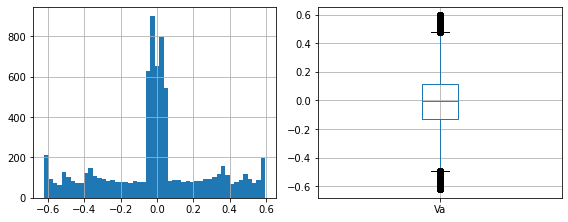

In [19]:
plt.figure(figsize = (8,6))
plt.subplot(2,2,1) # 2-rows, 2-columns and 1st subplot
df['Va'].hist(bins = 50)
plt.subplot(2,2,2) # 2-rows, 2-columns and 2nd subplot
df.boxplot('Va')
plt.tight_layout() # prevent the overlapping of figures

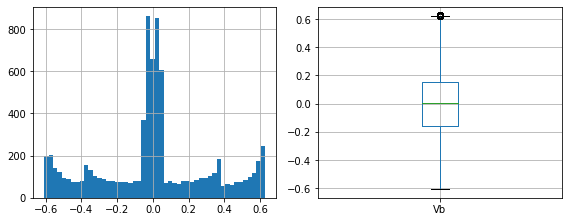

In [20]:
plt.figure(figsize = (8,6))
plt.subplot(2,2,1) # 2-rows, 2-columns and 1st subplot
df['Vb'].hist(bins = 50)
plt.subplot(2,2,2) # 2-rows, 2-columns and 2nd subplot
df.boxplot('Vb')
plt.tight_layout() # prevent the overlapping of figures

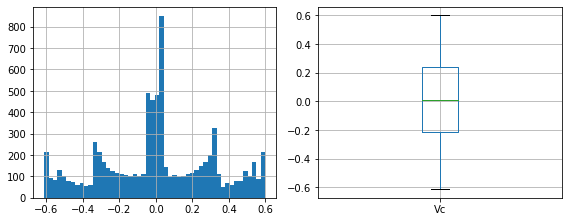

In [21]:
plt.figure(figsize = (8,6))
plt.subplot(2,2,1) # 2-rows, 2-columns and 1st subplot
df['Vc'].hist(bins = 50)
plt.subplot(2,2,2) # 2-rows, 2-columns and 2nd subplot
df.boxplot('Vc')
plt.tight_layout() # prevent the overlapping of figures

Note:
    
    We have noticed Current Paramters that is Ia, Ib, Ic are having wide range of values therefore they are causing outliers issue. We cannot just remove the records because the data is very less.One solution for this is applying feature scaling on those current features.

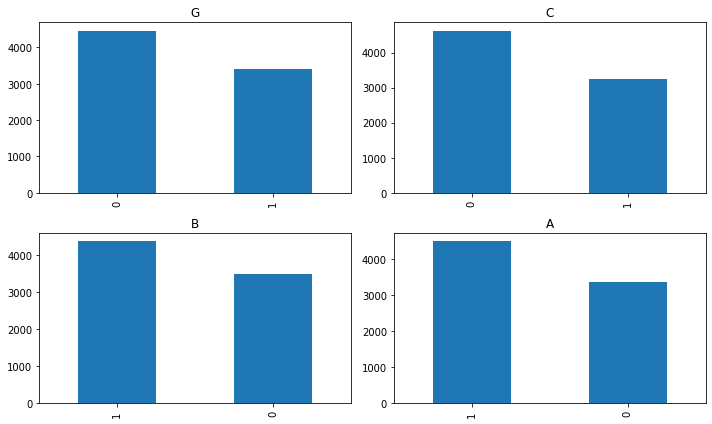

In [22]:
#Check for imbalanced dataset
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
plt.title('G')
df['G'].value_counts().plot(kind = 'bar')
plt.subplot(2,2,2)
plt.title('C')
df['C'].value_counts().plot(kind = 'bar')
plt.subplot(2,2,3)
plt.title('B')
df['B'].value_counts().plot(kind = 'bar')
plt.subplot(2,2,4)
plt.title('A')
df['A'].value_counts().plot(kind = 'bar')
plt.tight_layout()

#Note: The dataset is balanced

In [23]:
df.columns

Index(['G', 'C', 'B', 'A', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')

## Feature Scaling

In [24]:
x = df.drop(columns = ['G','C','B','A'])
y = df[['G','C','B','A']]

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state= 10)

In [26]:
x_train.shape

(6288, 6)

In [27]:
current_train = x_train.drop(columns = ['Va','Vb','Vc'])
current_train.head()

,Ia,Ib,Ic
5170,-788.655728,739.091922,49.561543
6212,-69.527452,81.777873,-15.610053
5593,48.586030,-21.064266,-27.025873
7752,-28.185556,92.657229,-67.369128
7118,-21.092168,-14.986182,32.998865


In [28]:
voltage_train = x_train[['Va','Vb','Vc']]
voltage_train.head()

,Va,Vb,Vc
5170,-0.000654,0.037034,-0.036380
6212,-0.312308,-0.286908,0.599216
5593,0.424838,0.162779,-0.587617
7752,-0.614224,0.259343,0.354881
7118,0.540213,-0.471532,-0.068681


In [29]:
current_test = x_test.drop(columns = ['Va','Vb','Vc'])
current_test.head()

,Ia,Ib,Ic
2669,45.634583,59.726389,-102.650437
6900,21.381226,66.679004,-91.204911
2502,-69.830748,341.658246,-269.367551
2218,603.011449,45.176061,32.992676
3606,-30.001335,780.520542,-748.398252


In [30]:
volatge_test = x_test[['Va','Vb','Vc']]
volatge_test.head()

,Va,Vb,Vc
2669,0.485733,0.041909,-0.527642
6900,-0.475572,0.589884,-0.114312
2502,-0.366806,-0.039522,0.406329
2218,0.173015,-0.489396,0.316382
3606,0.036803,-0.000242,-0.036561


In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [32]:
current_train = pd.DataFrame(ss.fit_transform(current_train),columns = ['Ia','Ib','Ic'])
current_test = pd.DataFrame(ss.transform(current_test),columns = ['Ia','Ib','Ic'])

In [33]:
current_train.head()

,Ia,Ib,Ic
0,-1.739949,1.787266,0.045632
1,-0.183668,0.284800,-0.129582
2,0.071944,0.049727,-0.160273
3,-0.094199,0.309668,-0.268736
4,-0.078848,0.063620,0.001103


In [34]:
voltage_train.head()

,Va,Vb,Vc
5170,-0.000654,0.037034,-0.036380
6212,-0.312308,-0.286908,0.599216
5593,0.424838,0.162779,-0.587617
7752,-0.614224,0.259343,0.354881
7118,0.540213,-0.471532,-0.068681


Note: 
    
    Since the index number is changing after apply scaling we have to reset the index

In [35]:
current_train.reset_index(drop = True, inplace = True)

In [36]:
voltage_train.reset_index(drop = True, inplace = True)

In [37]:
x_train_s = pd.concat([current_train,voltage_train],axis = 1)

In [38]:
current_test.reset_index(drop = True, inplace = True)
volatge_test.reset_index(drop = True, inplace = True)

In [39]:
x_test_s = pd.concat([current_test,volatge_test],axis = 1)

In [40]:
x_train.head()

,Ia,Ib,Ic,Va,Vb,Vc
5170,-788.655728,739.091922,49.561543,-0.000654,0.037034,-0.036380
6212,-69.527452,81.777873,-15.610053,-0.312308,-0.286908,0.599216
5593,48.586030,-21.064266,-27.025873,0.424838,0.162779,-0.587617
7752,-28.185556,92.657229,-67.369128,-0.614224,0.259343,0.354881
7118,-21.092168,-14.986182,32.998865,0.540213,-0.471532,-0.068681


In [41]:
x_train_s.head()

,Ia,Ib,Ic,Va,Vb,Vc
0,-1.739949,1.787266,0.045632,-0.000654,0.037034,-0.036380
1,-0.183668,0.284800,-0.129582,-0.312308,-0.286908,0.599216
2,0.071944,0.049727,-0.160273,0.424838,0.162779,-0.587617
3,-0.094199,0.309668,-0.268736,-0.614224,0.259343,0.354881
4,-0.078848,0.063620,0.001103,0.540213,-0.471532,-0.068681


## Model Building

We will build two models for our project which are Decision Tree Classifier and KNN Classifier

### 1. Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth= 35,ccp_alpha= 0.0,criterion= 'entropy')

In [43]:
dtc.fit(x_train_s,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=35)

In [44]:
y_pred1 = dtc.predict(x_test_s)

#### Accuracy score, Actual Vs Predicted, Cross-Validation

In [45]:
from sklearn.metrics import accuracy_score
print('Score on Test is {}'.format(accuracy_score(y_test,y_pred1).round(2)))

Score on Test is 0.86


In [46]:
print('Score on Train is {}'.format(dtc.score(x_train_s,y_train).round(2)))

Score on Train is 0.92


In [47]:
y_test.head().values

array([[0, 1, 1, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 1, 1],
       [0, 1, 1, 1]], dtype=int64)

In [48]:
y_pred1[:5]

array([[0, 1, 1, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 1, 1],
       [0, 1, 1, 1]], dtype=int64)

In [49]:
from sklearn.model_selection import KFold,cross_validate
kfold = KFold(n_splits = 5)
cross_validation = cross_validate(dtc,x_train_s,y_train,cv = kfold,scoring = ['accuracy'])

In [50]:
# cross_validation['test_accuracy'].mean()
print('Cross Validation Score is {}'.format(cross_validation['test_accuracy'].mean()))

Cross Validation Score is 0.8680027774510435


### 3. KNN Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
moc = MultiOutputClassifier(KNeighborsClassifier(n_neighbors = 7,algorithm = 'kd_tree',weights='distance',p = 2))

In [52]:
moc.fit(x_train_s,y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(algorithm='kd_tree',
                                                     n_neighbors=7,
                                                     weights='distance'))

In [53]:
y_pred2 = moc.predict(x_test_s)

#### Accuracy score, Actual Vs Predicted, Cross-Validation

In [54]:
from sklearn.metrics import accuracy_score
print('Score on Test is {}'.format(accuracy_score(y_test,y_pred2).round(2)))

Score on Test is 0.87


In [55]:
y_test.head().values

array([[0, 1, 1, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 1, 1],
       [0, 1, 1, 1]], dtype=int64)

In [56]:
y_pred2[:5]

array([[0, 1, 1, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 1, 1],
       [0, 1, 1, 1]], dtype=int64)

In [57]:
from sklearn.model_selection import KFold,cross_validate
kfold = KFold(n_splits = 5)
cross_validation = cross_validate(moc,x_train_s,y_train,cv = kfold,scoring = ['accuracy'])

In [58]:
print('Cross Validation Score is {}'.format(cross_validation['test_accuracy'].mean()))

Cross Validation Score is 0.8589391300608484


In [59]:
from sklearn.metrics import classification_report

In [60]:
target_names = ['G','C','B','A']
print(classification_report(y_test,dtc.predict(x_test_s),target_names = target_names))

              precision    recall  f1-score   support

           G       0.87      0.82      0.85       714
           C       1.00      1.00      1.00       643
           B       1.00      1.00      1.00       887
           A       1.00      1.00      1.00       935

   micro avg       0.97      0.96      0.97      3179
   macro avg       0.97      0.95      0.96      3179
weighted avg       0.97      0.96      0.96      3179
 samples avg       0.70      0.70      0.70      3179

